# PetFinder.my Pawpularity Score / Tuner

## Imports

In [1]:
# Imports
import os
import numpy as np
from IPython.display import display

# Import utility libs
import petfinder_pawpularity_config as config
import petfinder_pawpularity_lib as mllib
tf_strategy = mllib.tf_strategy()

'TensorFlow Version: 2.8.0'

'TensorFlow Strategy: _DefaultDistributionStrategy'

'Built With GPU Support: True'

'Built With CUDA: True'

'Device: /device:GPU:0'

In [2]:
# Enable retina display
%config InlineBackend.figure_format = "retina"

# Load Tensorboard
%load_ext tensorboard

## Settings

In [3]:
# Settings
settings, debug = config.get_settings(
    process="tune",
    fallback_mode="full"
)
mllib.show_dict(settings)

'Settings: local-tune-full'

,Key,Value
0,debug,True
1,model_load_dir,models
2,model_save_dir,models
3,dataset_dir_src,../input/petfinder-pawpularity-score
4,dataset_dir_cut,../input/petfinder-pawpularity-score
5,dataset_dir_copy,dataset-copy
6,dataset_batch_size,64
7,dataset_image_size,"(150, 150)"
8,dataset_cut_ratio,1.0
9,dataset_shrink_ratio,1.0


## Prepare data

'../input/petfinder-pawpularity-score'

'Copy ../input/petfinder-pawpularity-score/train.csv to dataset-copy/train.csv'

'Load training data from ../input/petfinder-pawpularity-score/train.csv'

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


Train / Validate / Test datasets items: 6912 / 1984 / 960

Train dataset:
Cause: could not parse the source code of <function <lambda> at 0x7fa4e01068b0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x7fa4e01068b0>: no matching AST found among candidates:

To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


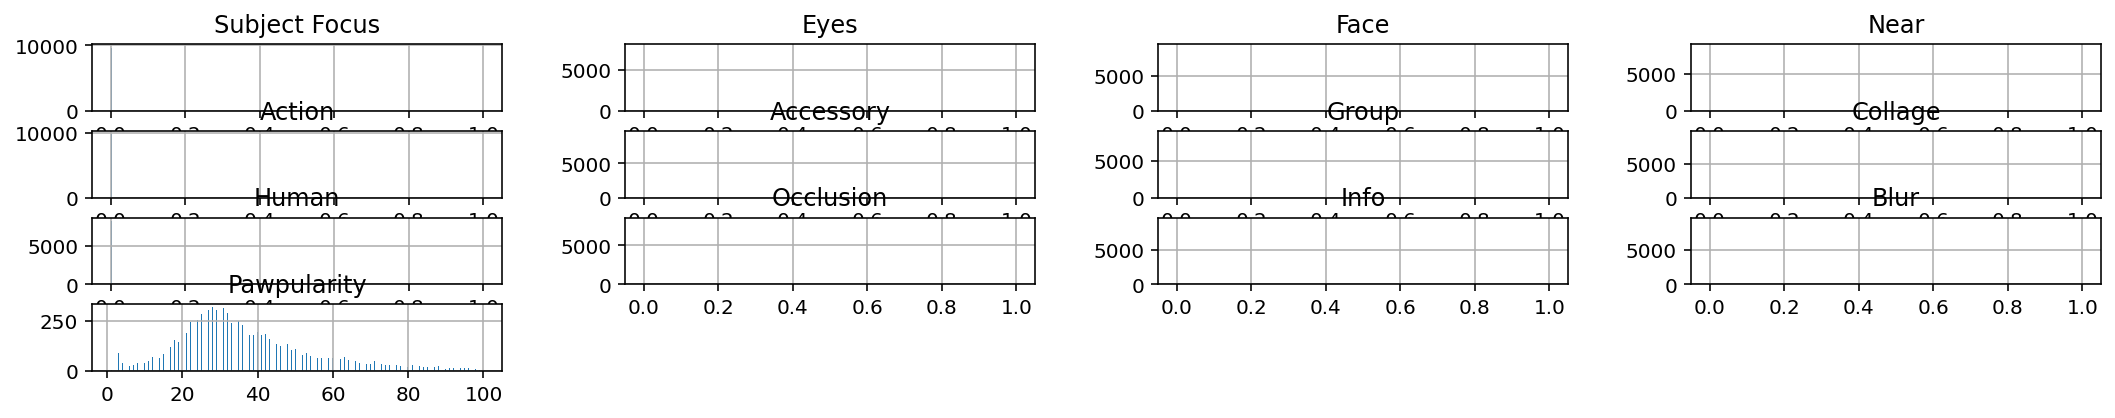

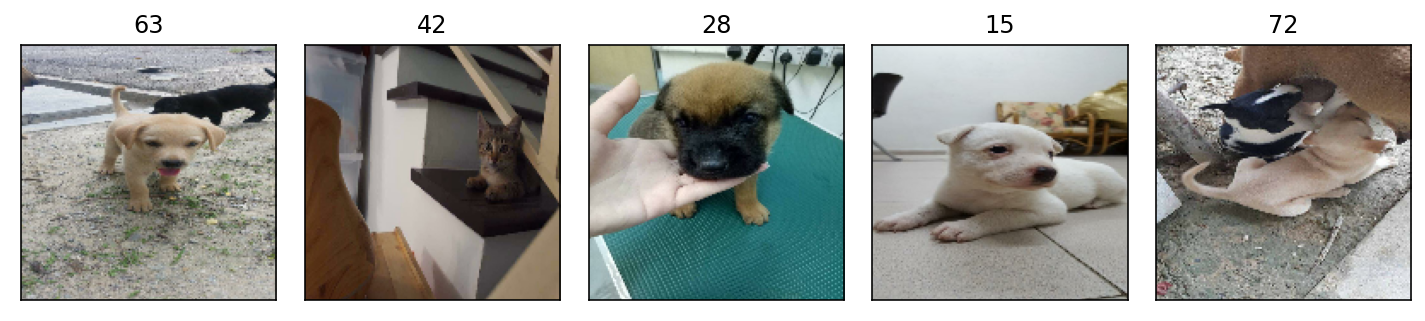

Validate dataset:


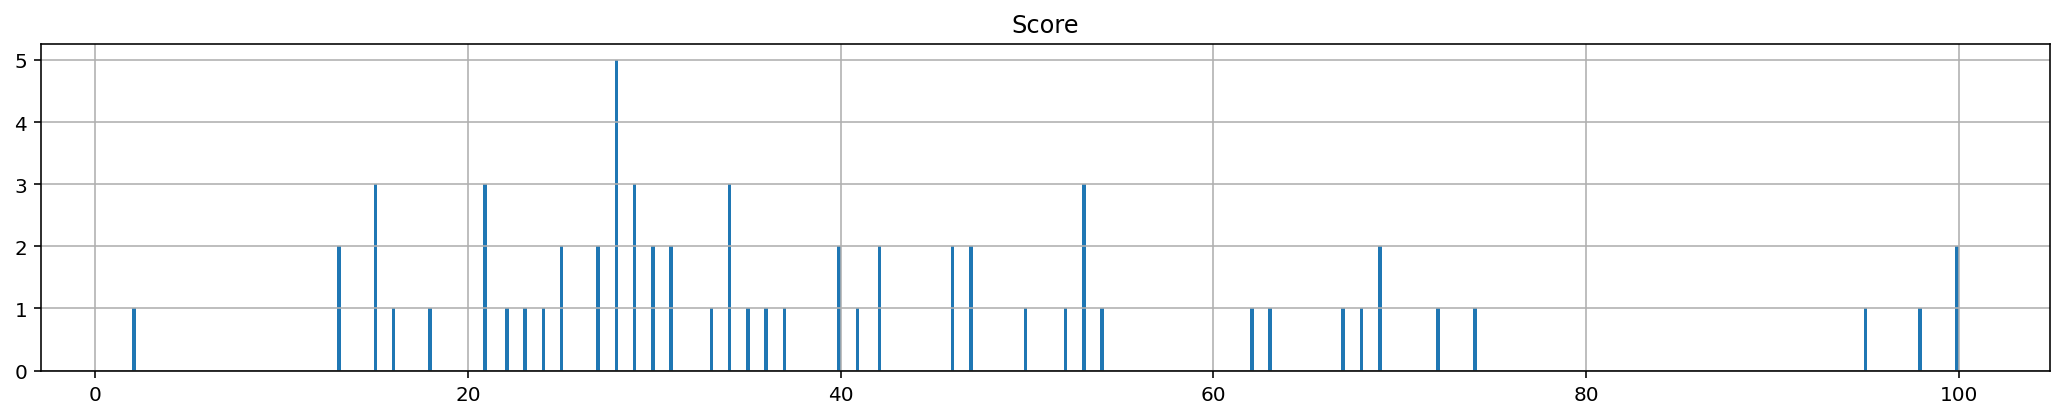

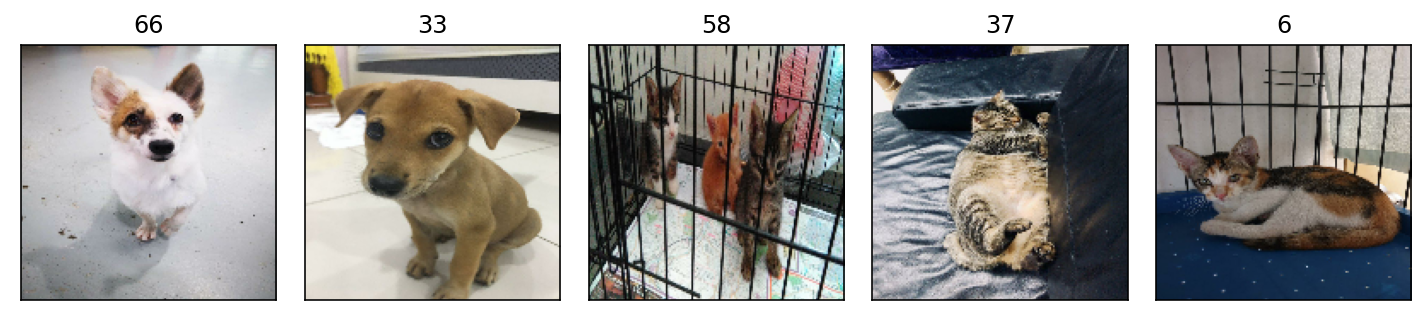

Test dataset:


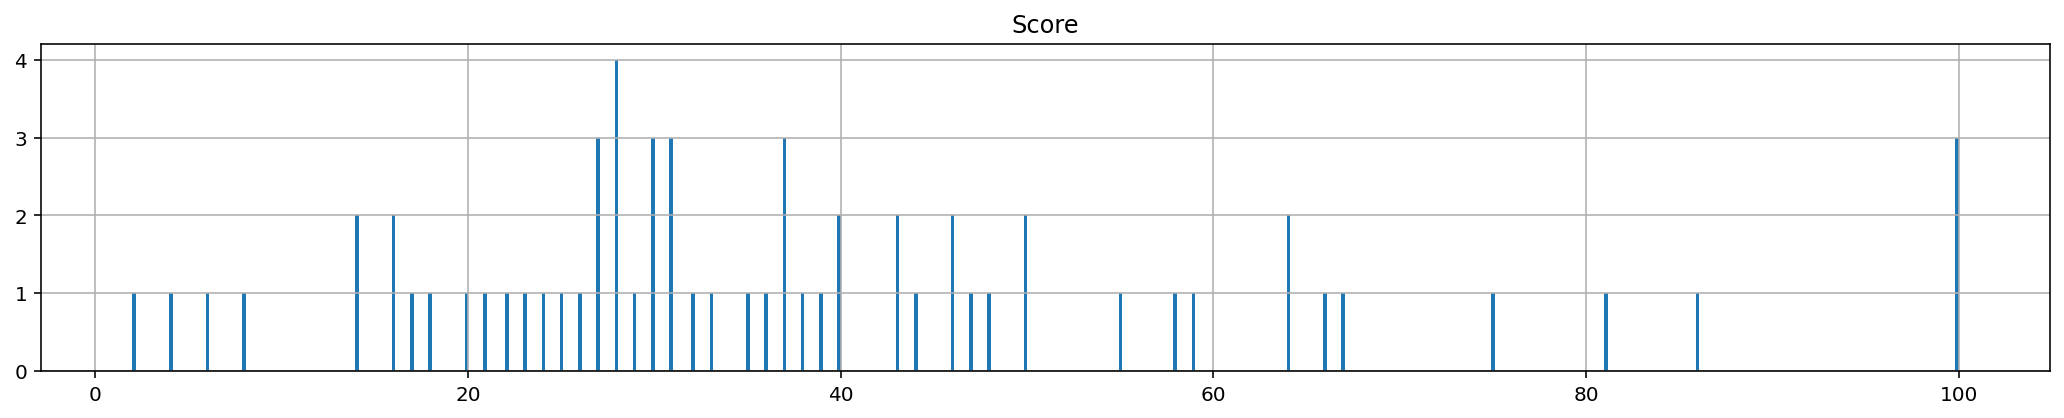

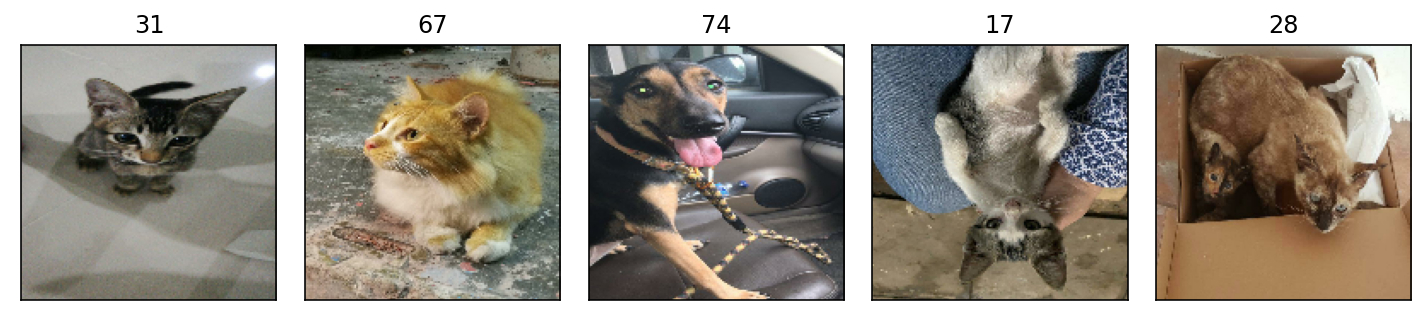

CPU times: user 16.9 s, sys: 1.87 s, total: 18.8 s
Wall time: 13.1 s


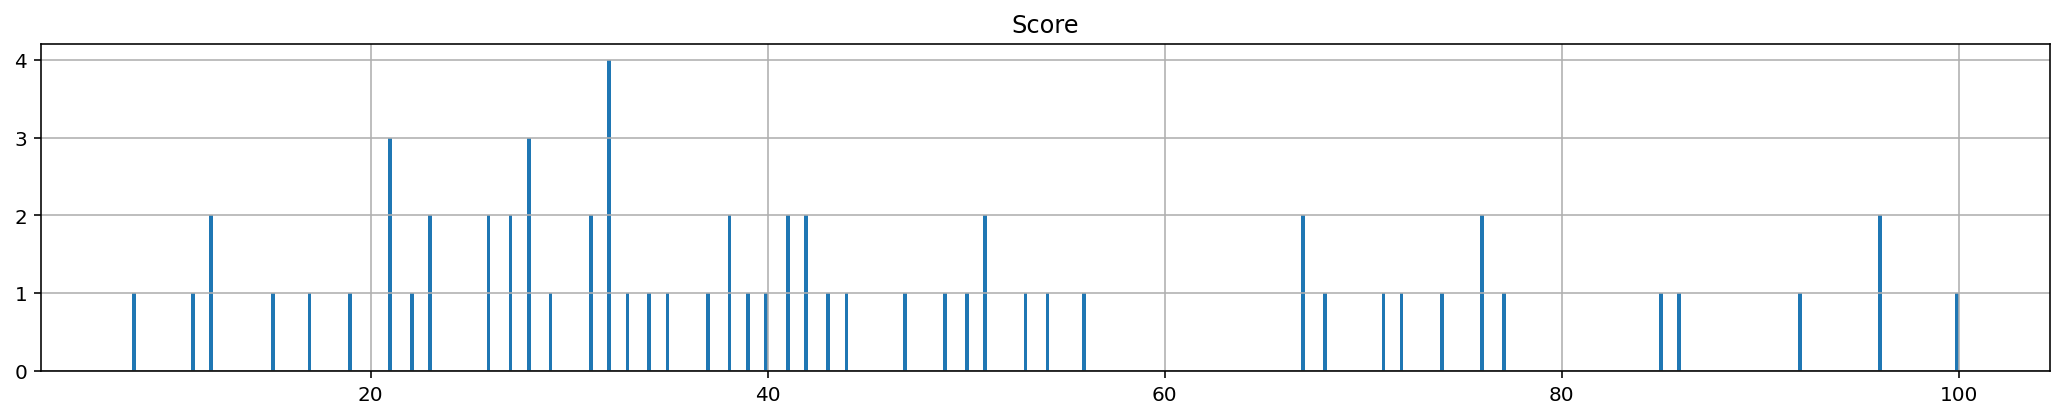

In [4]:
%%time
# Cut training data
dataset_dir = mllib.cut_training_data(
    cut_ratio=settings["dataset_cut_ratio"], 
    dataset_dir_src=settings["dataset_dir_src"], 
    dataset_dir_cut=settings["dataset_dir_cut"]
)
display(dataset_dir)

# Copy train.csv to output (It may be different with submission dataset)
if settings["dataset_dir_copy"] is not None:
    mllib.copy_file(os.path.join(dataset_dir, "train.csv"), os.path.join(settings["dataset_dir_copy"], "train%s.csv" % mllib.cut_suffix(settings["dataset_cut_ratio"])))

# Train data
training_data = mllib.load_training_data(dataset_dir)
if debug: 
    display(training_data)
    training_data.hist(bins=500, figsize=(18,3))

# Make training data
map_image_score_fn = lambda image, features, score, file_id: (image, score)  
train_dataset, validate_dataset, test_dataset = mllib.make_training_validate_test_data(
    dataset=mllib.load_training_dataset(
        dataset_dir=dataset_dir,
        mapping_data=training_data,
        batch_size=settings["dataset_batch_size"],
        shuffle=settings["dataset_shuffle"],
        seed=settings["dataset_shuffle_seed"],
        image_size=settings["dataset_image_size"],
    ),
    split_ratios=settings["dataset_split_ratios"],
    shrink_ratio=settings["dataset_shrink_ratio"],
    prefetch=settings["dataset_prefetch"],
)
 
# Training data infos
print("Train / Validate / Test datasets items: %s / %s / %s" % (
    settings["dataset_batch_size"] * train_dataset().cardinality().numpy(), 
    settings["dataset_batch_size"] * validate_dataset().cardinality().numpy(), 
    settings["dataset_batch_size"] * test_dataset().cardinality().numpy()
))
if debug:
    print("")
    print("Train dataset:")
    mllib.plot_images_scores_from_dataset(train_dataset().take(1).map(map_image_score_fn))
    print("Validate dataset:")
    mllib.plot_images_scores_from_dataset(validate_dataset().take(1).map(map_image_score_fn))
    print("Test dataset:")
    mllib.plot_images_scores_from_dataset(test_dataset().take(1).map(map_image_score_fn))

## Tune model

In [5]:
# Build hypermodel
def build_hypermodel():
    model_parameters = {
        "model_id": "model_1",
        "model_prefix": mllib.cut_suffix(settings["dataset_cut_ratio"]),
        "input_shape": [None, None, 3],
        "input_shape_features": len(mllib.feature_fields),
        "output_size": 1,
        "dense_layers_activation": "elu",
        "preload_weights": "imagenet",
        "fine_tuning": False,
    }
    model_parameters["model_name"] = "%s%s" % (model_parameters["model_id"], model_parameters["model_prefix"])
    def _build_model(hp):
        model_parameters["model_base"] = hp.Choice("model_base", values=settings["tuner_hyperparameter_model_base"])
        model_parameters["dropout_rate"] = hp.Choice("dropout_rate", values=settings["tuner_hyperparameter_dropout_rate"])
        model_parameters["learning_rate"] = hp.Choice("learning_rate", values=settings["tuner_hyperparameter_learning_rate"])
        model_parameters["image_resize"] = hp.Choice("input_shape", values=settings["tuner_hyperparameter_input_shape"])
        model_parameters["dense_layers"] = hp.Choice("dense_layers", values=settings["tuner_hyperparameter_dense_layers"])
        return mllib.setup_model(model_parameters)
    return _build_model

In [6]:
# Tune model
with tf_strategy.scope():
    tuner = mllib.tune_model(
        hypermodel=build_hypermodel(), 
        settings=settings, 
        train_dataset=train_dataset, 
        validate_dataset=validate_dataset,
    )

Trial 2 Complete [00h 00m 38s]
val_rmse: 38.909912109375

Best val_rmse So Far: 23.912321090698242
Total elapsed time: 00h 01m 00s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in tuner/petfinder-pawpularity
Showing 10 best trials
Trial summary
Hyperparameters:
model_base: xception
dropout_rate: 0.0
learning_rate: 0.001
input_shape: 75x75
dense_layers: 0
Score: 23.912321090698242
Trial summary
Hyperparameters:
model_base: efficientnetb5
dropout_rate: 0.5
learning_rate: 0.0001
input_shape: 75x75
dense_layers: 0
Score: 38.909912109375


## Cleanup

In [7]:
%%time
if settings["cleanup_data_flag"]: 
    mllib.delete_training_data(cut_ratio=settings["dataset_cut_ratio"], dataset_dir_cut=settings["dataset_dir_cut"])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
